# <span style="color:blue"> Projeto 01 - Concessão de cartões de crédito </span>
<span style="color:blue"> Este notebook é semelhante ao visto em vídeo, mas contém células azuis como esta, que trazem instruções para a sua atividade.</span>

<span style="color:blue">Após realizar as tarefas indicadas, você vai fazer o upload do seu arquivo no GitHub e enviar o link para a EBAC, ou alternativamente, fazer o upload do arquivo na plataforma da EBAC. Recomendamos o github, pois assim você já vai montando o seu portfólio.</span>

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [38]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [20]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas. Mas sinta-se à vontade para tentar observar outras variáveis.

In [26]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


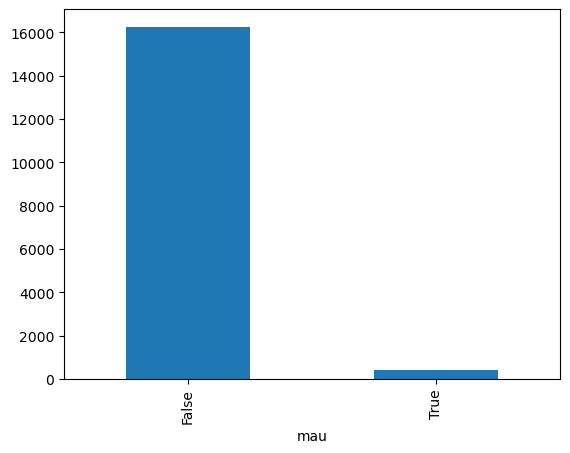

In [28]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

### <span style="color:blue">Tarefa 01 - gráfico de barras</span>
<span style="color:blue"> Com base no código da célula anterior, construa um gráfico de barras para pelo menos duas outras variáveis. 
**Dica:** Não tente usar as variáveis ```tempo_emprego``` e ```idade``` pois o gráfico de barras dessa forma como construímos não é adequado para elas. </span>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
print(df['estado_civil'].value_counts())

estado_civil
Married                 11680
Single / not married     2035
Civil marriage           1283
Separated                 945
Widow                     707
Name: count, dtype: int64


<Axes: xlabel='estado_civil'>

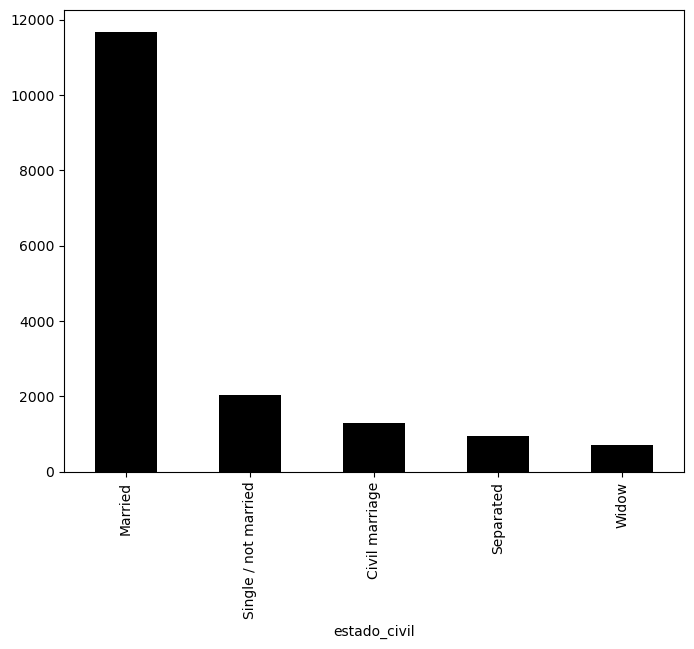

In [39]:
df['estado_civil'].value_counts().plot(kind='bar', figsize=(8, 6), color='black')

In [45]:
print(df['tipo_renda'].value_counts())

tipo_renda
Working                 8565
Commercial associate    3826
Pensioner               2800
State servant           1451
Student                    8
Name: count, dtype: int64


<Axes: xlabel='tipo_renda'>

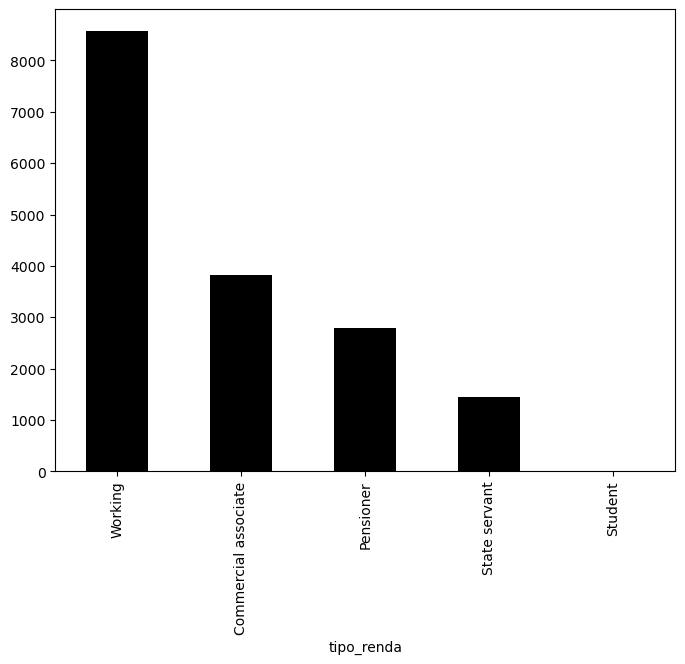

In [49]:
df['tipo_renda'].value_counts().plot(kind='bar', figsize=(8, 6), color='black')

In [55]:
import seaborn as sns  # Importando o Seaborn
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

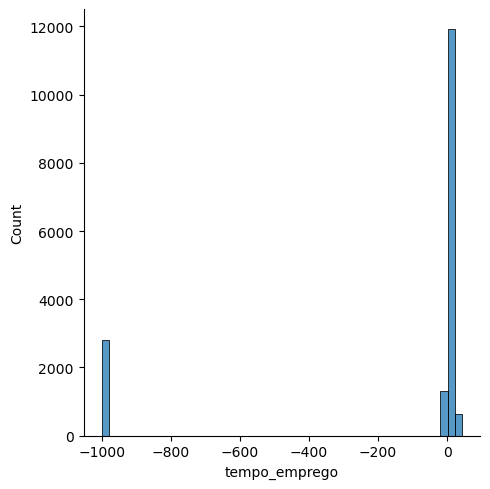

In [57]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

In [60]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

<Figure size 640x480 with 0 Axes>

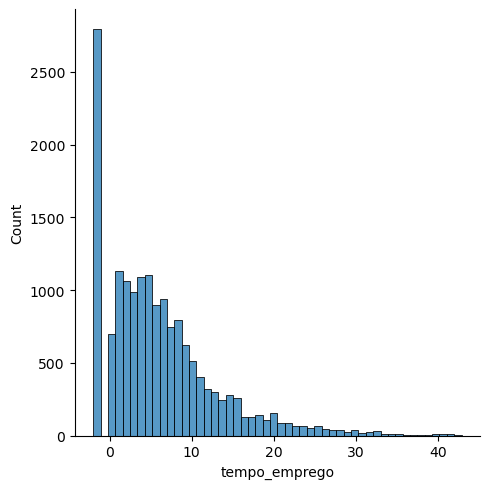

In [66]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

### <span style="color:blue">Tarefa 02 - Histograma </span>
<span style="color:blue"> Com base no código da célula anterior, construa o histograma da variavel ```idade```.  </span>

<Figure size 640x480 with 0 Axes>

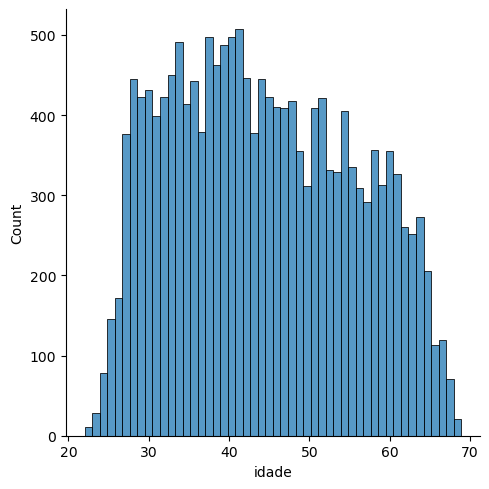

In [71]:
# Limpar qualquer gráfico anterior
plt.clf()

# Definir a variável para 'idade'
var = "idade"

# Criar o histograma usando Seaborn
sns.displot(df, x=var, bins=50)

# Mostrar o gráfico
plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.

/var/folders/6g/lyf9bdjd50z8m90n7z_1y13h0000gn/T/ipykernel_1229/2410414204.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


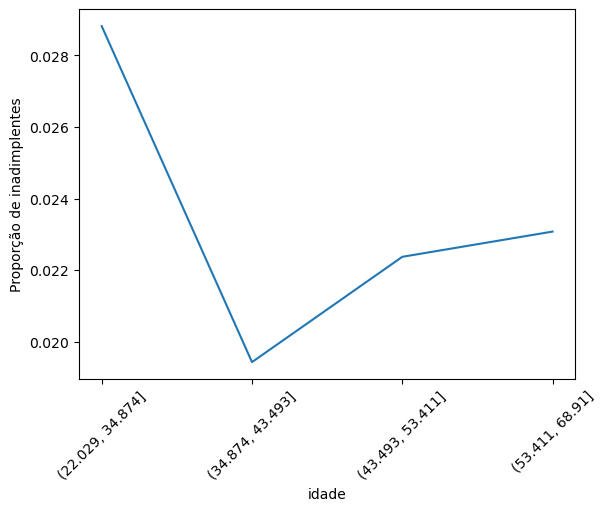

In [82]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 45)

### <span style="color:blue">Tarefa 03 - Bivariada </span>
<span style="color:blue"> Com base no código da célula anterior, construa uma análise bivariada para a variável  ```tempo_emprego```.  Em seguida, insira uma célula de markdown e conclua se a variável parece discriminar risco de crédito. </span>



/var/folders/6g/lyf9bdjd50z8m90n7z_1y13h0000gn/T/ipykernel_1229/324491166.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


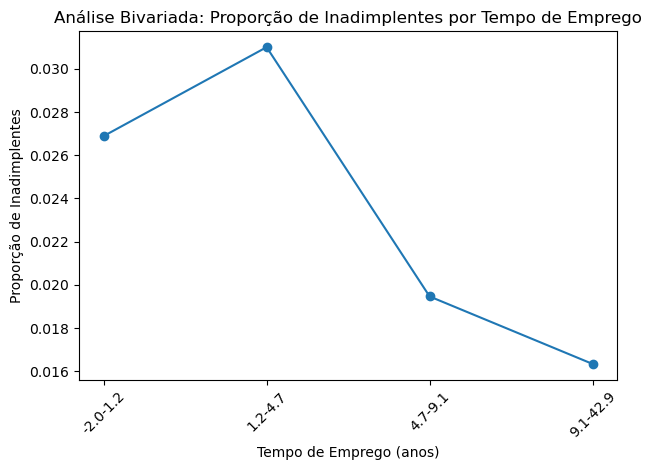

In [80]:
# Definindo a variável para 'tempo_emprego'
var = 'tempo_emprego'

# Criando categorias de 'tempo_emprego' com base em quartis
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)

# Agrupando por categorias e calculando a média de 'mau'
g = df.groupby(cat_srs)
biv = g['mau'].mean()

# Criando o gráfico de linha
ax = biv.plot.line(marker='o')
ax.set_ylabel("Proporção de Inadimplentes")
ax.set_xlabel("Tempo de Emprego (anos)")
ax.set_title("Análise Bivariada: Proporção de Inadimplentes por Tempo de Emprego")
ticks = plt.xticks(range(len(biv.index.values)), [f"{round(bin_left, 1)}-{round(bin_right, 1)}" for bin_left, bin_right in zip(bins[:-1], bins[1:])], rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [85]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

/var/folders/6g/lyf9bdjd50z8m90n7z_1y13h0000gn/T/ipykernel_1229/3403988064.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())


,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [189]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [177]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tempo_emprego_cat,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,2-5 anos,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,5-10 anos,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,5-10 anos,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,2-5 anos,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,2-5 anos,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,5-10 anos,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,5-10 anos,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,5-10 anos,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,5-10 anos,...,False,False,False,False,False,False,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Importando a função

# Tirando a variável resposta da base de treinamento
x = df.drop("mau", axis=1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,tempo_emprego_cat,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
12847,2,31.671233,1.279452,1,1,0,0,4.0,0-2 anos,False,...,False,False,False,False,False,False,False,False,False,False
1608,2,35.608219,14.983562,1,0,0,0,4.0,10-20 anos,True,...,False,False,False,False,False,False,False,False,True,False
15503,0,53.463014,5.454795,1,1,0,0,1.0,5-10 anos,False,...,False,False,True,False,False,False,False,False,False,True
2562,1,32.715068,7.561644,1,0,0,0,3.0,5-10 anos,False,...,False,False,False,False,False,False,False,False,False,True
12332,0,47.057534,0.361644,1,0,0,0,2.0,0-2 anos,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,39.654795,2.767123,1,1,0,0,3.0,2-5 anos,True,...,False,False,False,False,False,False,False,False,False,False
11964,0,30.457534,7.331507,1,0,0,0,2.0,5-10 anos,True,...,False,False,False,False,False,False,True,False,False,False
5390,0,64.345205,-2.000000,1,0,0,0,2.0,NaN,False,...,False,False,False,False,False,False,False,False,False,False
860,0,35.353425,11.772603,1,0,1,0,1.0,10-20 anos,False,...,False,False,True,False,False,False,False,False,False,False


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Supondo que você já tenha o DataFrame df carregado e as variáveis x e y definidas
x = df.drop("mau", axis=1)
y = df["mau"]

# Verificar tipos de dados
print("Tipos de dados antes da codificação:")
print(x.dtypes)

# Codificar variáveis categóricas usando OneHotEncoder
x_encoded = pd.get_dummies(x, drop_first=True)  # drop_first para evitar a armadilha da variável dummy

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Treinar uma Random Forest com 3 árvores
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train, y_train)

# Opcional: Avaliar o modelo
accuracy = clf.score(x_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2f}")

Tipos de dados antes da codificação:
qtd_filhos                                int64
idade                                   float64
tempo_emprego                           float64
possui_celular                            int64
possui_fone_comercial                     int64
possui_fone                               int64
possui_email                              int64
qt_pessoas_residencia                   float64
tempo_emprego_cat                      category
sexo_M                                     bool
posse_de_veiculo_Y                         bool
posse_de_imovel_N                          bool
tipo_renda_Commercial associate            bool
tipo_renda_Pensioner                       bool
tipo_renda_State servant                   bool
tipo_renda_Student                         bool
educacao_Academic degree                   bool
educacao_Higher education                  bool
educacao_Incomplete higher                 bool
educacao_Lower secondary                   bool
est

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics  # Importando o módulo de métricas

x = df.drop("mau", axis=1)
y = df["mau"]

# Codificar variáveis categóricas usando OneHotEncoder
x_encoded = pd.get_dummies(x, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Treinar uma Random Forest com 3 árvores
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train, y_train)

# Calculando a acurácia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc * 100))

Acurácia: 97.48%


In [138]:
# Matriz de confusão
tab = pd.crosstab(index=y_pred, columns=y_test)

# Exibir a matriz de confusão
print("Matriz de confusão:")
print(tab)

# Verificar quais rótulos estão presentes na matriz
print("Rótulos presentes na matriz:")
print(tab.index, tab.columns)

# Calcular as métricas com base nos rótulos existentes
if 1 in tab.index and 0 in tab.columns:
    print("Taxa de verdadeiros positivos (TPR):", tab[1][0] / (tab[1][0] + tab[0][0]))
if 1 in tab.index and 1 in tab.columns:
    print("Taxa de verdadeiros negativos (TNR):", tab[1][1] / (tab[1][1] + tab[0][1]))

Matriz de confusão:
mau    False  True 
row_0              
False   3232     53
True      31     14
Rótulos presentes na matriz:
Index([False, True], dtype='bool', name='row_0') Index([False, True], dtype='bool', name='mau')


### <span style="color:blue">Tarefa 04 - Bivariada </span>
<span style="color:blue"> Para essa tarefa, crie três células extras, copie nelas o código das três células anteriores (na mesma ordem) e altere o parâmetro ```n_estimators=``` da função ```RandomForestClassifier``` e insira uma quantidade maior que 3 nesse parâmetro. Rode as três células anteriores para calcular a acurácia do modelo e veja se você consegue uma acurácia melhor. </span>

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# Supondo que você já tenha o DataFrame df carregado e as variáveis x e y definidas
x = df.drop("mau", axis=1)
y = df["mau"]

# Codificar variáveis categóricas usando OneHotEncoder
x_encoded = pd.get_dummies(x, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [159]:
# Treinar uma Random Forest com 10 árvores (ou outro valor maior que 3)
clf = RandomForestClassifier(n_estimators=9)  # Altere aqui para um valor maior
clf.fit(x_train, y_train)

# Calculando a acurácia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc * 100))

Acurácia: 97.54%


In [161]:
# Matriz de confusão
tab = pd.crosstab(index=y_pred, columns=y_test)

# Exibir a matriz de confusão
print("Matriz de confusão:")
print(tab)

# Verificar quais rótulos estão presentes na matriz
print("Rótulos presentes na matriz:")
print(tab.index, tab.columns)

# Calcular as métricas com base nos rótulos existentes
if 1 in tab.index and 0 in tab.columns:
    print("Taxa de verdadeiros positivos (TPR):", tab[1][0] / (tab[1][0] + tab[0][0]))
if 1 in tab.index and 1 in tab.columns:
    print("Taxa de verdadeiros negativos (TNR):", tab[1][1] / (tab[1][1] + tab[0][1]))

Matriz de confusão:
mau    False  True 
row_0              
False   3235     54
True      28     13
Rótulos presentes na matriz:
Index([False, True], dtype='bool', name='row_0') Index([False, True], dtype='bool', name='mau')


## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste casp, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4042 x 5          | 72 x (-100)    | 13.010 |
| Reprovar  |  27 x 5           | 22 x (-100)    | -2.065 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.